## Regression using Neural-Network, Keras API
* We can easily fit the regression data with Keras sequential model and predict the test data
    * how to fit regression data with the Keras neural network API
    * using KerasRegressor wrapper and the 
    * Keras sequential model itself

1. Preparing data
2. Defining the model
3. Fitting with KerasRegressor (accuracy check and visualizing the results)
4. Fitting with the sequential model (accuracy check and visualizing the results)

In [1]:
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

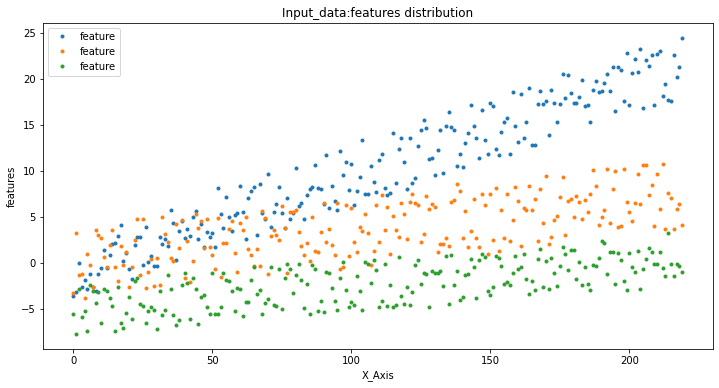

In [40]:
#Generate/Preparing data
random.seed(123)
def CreateDataset(N):
    x1,x2,x3,y = [],[],[],[]
    for i in range(N):
        xx1 = i/10+random.uniform(-4,3)
        xx2 = i/30+random.uniform(-4,4)
        xx3 = i/40+random.uniform(-3,3)-5
        yy = (xx1+xx2+xx3/2)/3
        x1.append([xx1])
        x2.append([xx2])
        x3.append([xx3])
        y.append([yy])
    return np.hstack([x1,x2,x3]), np.array(y)

N = 220
features,label = CreateDataset(N)
x_axis = range(N)

plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution')
plt.legend()
plt.show()
 

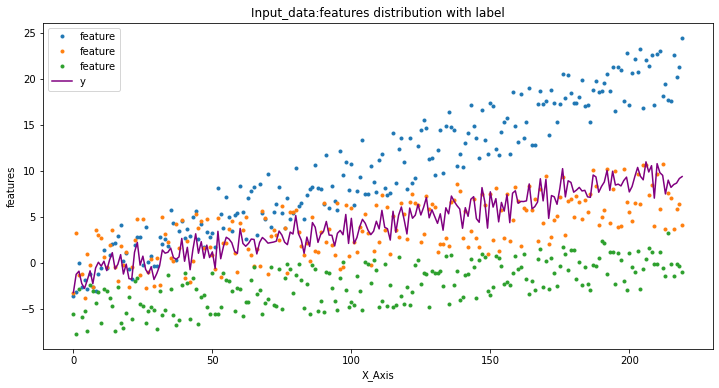

In [43]:
plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.plot(x_axis, label, lw=1.5, color="purple", label="y")
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution with label')
plt.legend()
plt.show()
 

In [44]:
x.shape

(300, 3)

In [45]:
y.shape

(300, 1)

#### Purple-line is y output, and the remaining dots are features for x input.


In [53]:
#Defining the model
#Build a keras sequential model to use in KerasRegressor wrapper.

def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

BuildModel().summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_36 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


100/100 [==============================] - 0s 624us/step - loss: 4.0800
mse of keras_regrerssor: 0.13197776209009138


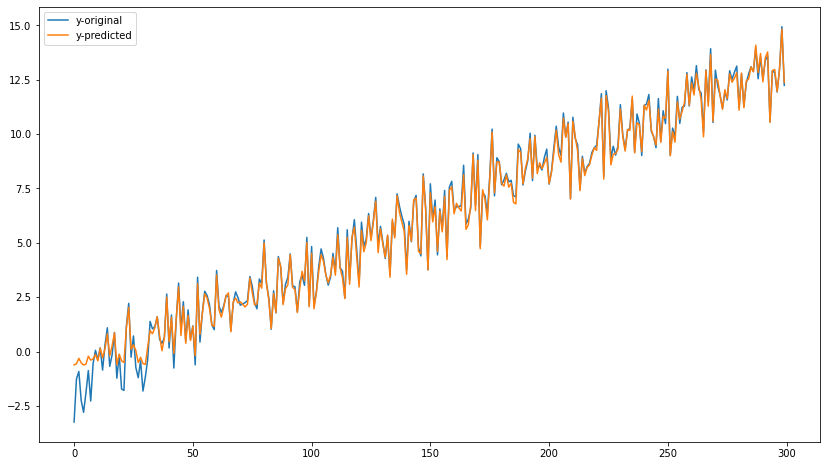

In [61]:
#Fitting with KerasRegressor
#Include the above model into KerasRegressor and fit model with x and y data. Then, we can predict x data.
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(x,y) 

y_pred = regressor.predict(x)
 
# check the mean_squared_error
mse_kr = mean_squared_error(y, y_pred)
print('mse of keras_regrerssor:',mse_kr)
 
#plot the results.
plt.figure(figsize=(14,8))
plt.plot(y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

In [57]:
#Fitting with keras sequential model
#Model without a wrapper

model = BuildModel()
model.fit(x, y, epochs=80, verbose=1, shuffle=False)

Epoch 1/80
10/10 [==============================] - 0s 734us/step - loss: 42.2052
Epoch 2/80
10/10 [==============================] - 0s 946us/step - loss: 28.5533
Epoch 3/80
10/10 [==============================] - 0s 1ms/step - loss: 13.1370
Epoch 4/80
10/10 [==============================] - 0s 1ms/step - loss: 1.2331
Epoch 5/80
10/10 [==============================] - 0s 1ms/step - loss: 1.1613
Epoch 6/80
10/10 [==============================] - 0s 1ms/step - loss: 0.4166
Epoch 7/80
10/10 [==============================] - 0s 1ms/step - loss: 0.2632
Epoch 8/80
10/10 [==============================] - 0s 1ms/step - loss: 0.1041
Epoch 9/80
10/10 [==============================] - 0s 1ms/step - loss: 0.0563
Epoch 10/80
10/10 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 11/80
10/10 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 12/80
10/10 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 13/80
10/10 [=======================

mse of keras_sequential/NN_model: 0.004055212908544335


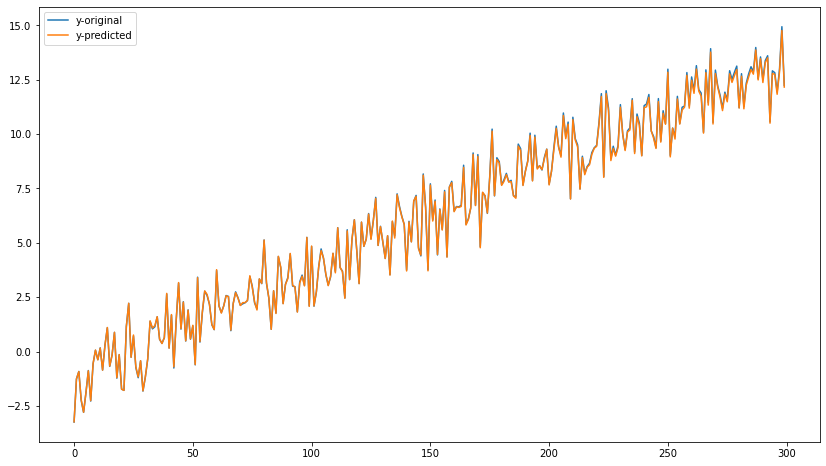

In [63]:
#prediction
y_model = model.predict(x)

#check a mean_squared_error
mse_model=mean_squared_error(y, y_model)
print('mse of keras_sequential/NN_model:',mse_model)
 
#plot the results
plt.figure(figsize=(14,8))
plt.plot(y, label="y-original")
plt.plot(y_model, label="y-predicted")
plt.legend()
plt.show()
#

## Multi-output Regression using Keras Sequential Model
#### - Multi-output regression data contains more than one output value for a given input data

1. Preparing the data
2. Defining the model
3. Predicting and visualizing the result

In [108]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

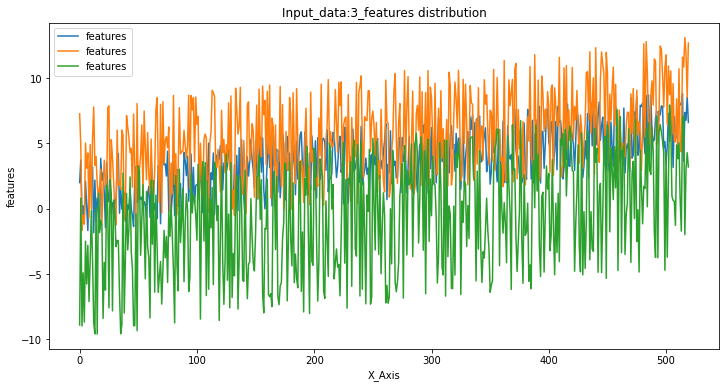

In [109]:
#preparing the data
def create_data(n):
    x1 = array([i/100+uniform(-2,4) for i in range(n)]).reshape(n,1)
    x2 = array([i/100+uniform(-4,6)+2 for i in range(n)]).reshape(n,1)
    x3 = array([i/100+uniform(-7,6)-3 for i in range(n)]).reshape(n,1)
    
    y1= [x1[i]-x2[i]+x3[i]+uniform(-3,3) for i in range(n)]
    y2= [x1[i]+x2[i]-x3[i]+5+uniform(-2,4) for i in range(n)]
    
    X = hstack((x1, x2, x3))
    Y = hstack((y1, y2))
    return X, Y

n=520
x_features, y_label = create_data(n)
xaxis=range(n)

#plotting x_features
plt.figure(figsize=(12,6))
plt.plot(xaxis, x_features, label="features", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:3_features distribution')
plt.legend()
plt.show()

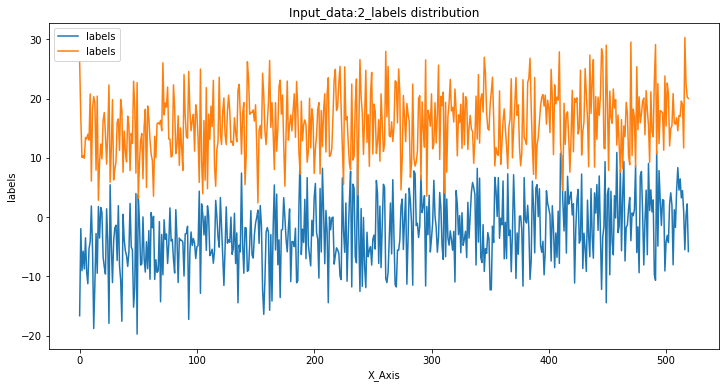

In [110]:
#plotting y_labels
plt.figure(figsize=(12,6))
plt.plot(xaxis, y_label, label="labels", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('labels')
plt.title('Input_data:2_labels distribution')
plt.legend()
plt.show()

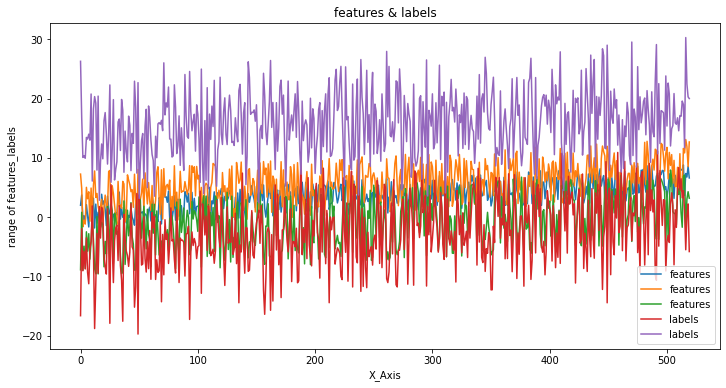

In [111]:
#plotting x_features
plt.figure(figsize=(12,6))
plt.plot(xaxis, x_features, label="features", markersize=3)
plt.plot(xaxis, y_label, label="labels", markersize=2)
plt.xlabel('X_Axis')
plt.ylabel('range of features_labels')
plt.title('features & labels')
plt.legend()
plt.show()

In [114]:
print("X:", X.shape, "Y:", Y.shape)
 
in_dim = X.shape[1]
out_dim = Y.shape[1]

xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

X: (520, 3) Y: (520, 2)
(442, 3)
(442, 2)
(78, 3)
(78, 2)


In [121]:
import tensorflow as tf
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))
#model.add(Dense(2))
model.compile(optimizer='adam', loss=tf.keras.losses.LogCosh(), metrics='mse')
 
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_99 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_100 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_101 (Dense)            (None, 2)                 34        
Total params: 5,202
Trainable params: 5,202
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=1)


Epoch 1/100
37/37 [==============================] - 0s 793us/step - loss: 8.5273 - mse: 124.2663
Epoch 2/100
37/37 [==============================] - 0s 784us/step - loss: 3.2343 - mse: 24.2442
Epoch 3/100
37/37 [==============================] - 0s 788us/step - loss: 1.6597 - mse: 8.1048
Epoch 4/100
37/37 [==============================] - 0s 813us/step - loss: 1.1983 - mse: 4.6600
Epoch 5/100
37/37 [==============================] - 0s 775us/step - loss: 1.1067 - mse: 4.0833
Epoch 6/100
37/37 [==============================] - 0s 950us/step - loss: 1.0566 - mse: 3.8300
Epoch 7/100
37/37 [==============================] - 0s 843us/step - loss: 1.0367 - mse: 3.7148
Epoch 8/100
37/37 [==============================] - 0s 830us/step - loss: 1.0295 - mse: 3.6565
Epoch 9/100
37/37 [==============================] - 0s 850us/step - loss: 1.0239 - mse: 3.6567
Epoch 10/100
37/37 [==============================] - 0s 827us/step - loss: 1.0149 - mse: 3.5550
Epoch 11/100
37/37 [================

37/37 [==============================] - 0s 966us/step - loss: 0.8527 - mse: 2.7699
Epoch 86/100
37/37 [==============================] - 0s 1ms/step - loss: 0.8440 - mse: 2.7250
Epoch 87/100
37/37 [==============================] - 0s 928us/step - loss: 0.8403 - mse: 2.7220
Epoch 88/100
37/37 [==============================] - 0s 917us/step - loss: 0.8411 - mse: 2.7325
Epoch 89/100
37/37 [==============================] - 0s 925us/step - loss: 0.8374 - mse: 2.7046
Epoch 90/100
37/37 [==============================] - 0s 938us/step - loss: 0.8301 - mse: 2.6593
Epoch 91/100
37/37 [==============================] - 0s 882us/step - loss: 0.8371 - mse: 2.6884
Epoch 92/100
37/37 [==============================] - 0s 872us/step - loss: 0.8480 - mse: 2.7369
Epoch 93/100
37/37 [==============================] - 0s 889us/step - loss: 0.8306 - mse: 2.6763
Epoch 94/100
37/37 [==============================] - 0s 894us/step - loss: 0.8385 - mse: 2.6985
Epoch 95/100
37/37 [=========================

In [123]:
#Predicting and visualizing the result
ypred = model.predict(xtest)

In [126]:
ypred.shape

(78, 2)

In [128]:
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

mse_multioutput= mean_squared_error(ytest, ypred)
print('mse_multioutput:', mse_multioutput)

y1 MSE:3.3538
y2 MSE:3.2628
mse_multioutput: 3.3083074732100854


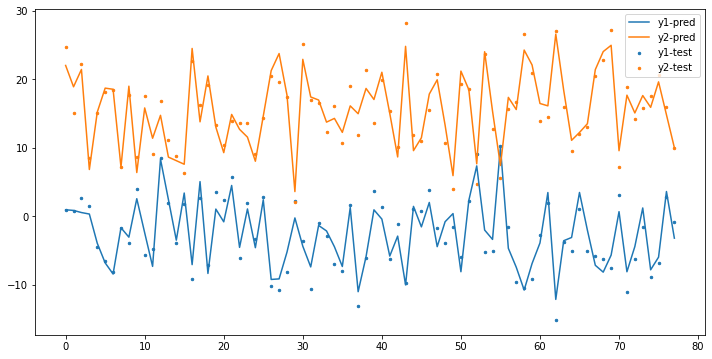

In [130]:
#plotting ground_truth vs predictions
x_axis = range(len(xtest))

plt.figure(figsize=(12,6))
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()

### Tips:

* Use the ADAM optimizer
* ReLU and it's types (i.e. LeakyReLu, PReLu, etc... are the best nonlinearity (activation function)
* DO add a bias in every layer
* Do NOT use an activation function at output layer
* Whiten (normalize) input data
* Scale input data in a way that reasonably preserves its dynamic range